In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pysal as ps
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from math import ceil
from pandas import * 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

/Users/axleabner/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [6]:
dfman= pd.read_csv(f'manh.csv',error_bad_lines=False)

In [8]:
dfman

,Unnamed: 0,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,3,4,0.043567,0.000112,Alphabet City,4,Manhattan
1,11,12,0.036661,0.000042,Battery Park,12,Manhattan
2,12,13,0.050281,0.000149,Battery Park City,13,Manhattan
3,23,24,0.047000,0.000061,Bloomingdale,24,Manhattan
4,40,41,0.052793,0.000143,Central Harlem,41,Manhattan
...,...,...,...,...,...,...,...
64,245,246,0.069467,0.000281,West Chelsea/Hudson Yards,246,Manhattan
65,248,249,0.036384,0.000072,West Village,249,Manhattan
66,260,261,0.027120,0.000034,World Trade Center,261,Manhattan
67,261,262,0.049064,0.000122,Yorkville East,262,Manhattan


In [12]:
dfman = dfman[["LocationID", "zone"]]

In [13]:
dfman

,LocationID,zone
0,4,Alphabet City
1,12,Battery Park
2,13,Battery Park City
3,24,Bloomingdale
4,41,Central Harlem
...,...,...
64,246,West Chelsea/Hudson Yards
65,249,West Village
66,261,World Trade Center
67,262,Yorkville East


In [7]:
df1= pd.read_csv(f'green_tripdata_2020-02.csv',error_bad_lines=False)

/Users/axleabner/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2020-02-01 00:10:25,2020-02-01 00:14:34,N,1.0,74,41,1.0,0.76,4.50,0.50,0.5,0.00,0.00,NaN,0.3,5.80,2.0,1.0,0.0
1,2.0,2020-02-01 00:16:59,2020-02-01 00:21:35,N,1.0,74,74,1.0,0.72,5.00,0.50,0.5,0.00,0.00,NaN,0.3,6.30,1.0,1.0,0.0
2,2.0,2020-02-01 00:19:31,2020-02-01 00:25:29,N,1.0,223,7,1.0,0.89,6.00,0.50,0.5,1.82,0.00,NaN,0.3,9.12,1.0,1.0,0.0
3,2.0,2020-02-01 00:43:52,2020-02-01 00:48:58,N,1.0,145,145,1.0,1.12,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
4,2.0,2020-02-01 00:32:53,2020-02-01 00:35:19,N,1.0,166,166,1.0,0.65,4.00,0.50,0.5,1.06,0.00,NaN,0.3,6.36,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398627,NaN,2020-02-29 23:51:00,2020-03-01 00:17:00,NaN,NaN,203,177,NaN,9.98,43.45,2.75,0.0,0.00,0.00,NaN,0.3,46.50,NaN,NaN,NaN
398628,NaN,2020-02-29 23:07:00,2020-02-29 23:20:00,NaN,NaN,91,71,NaN,2.48,17.94,2.75,0.0,0.00,0.00,NaN,0.3,20.99,NaN,NaN,NaN
398629,NaN,2020-02-29 23:48:00,2020-02-29 23:57:00,NaN,NaN,35,61,NaN,2.08,13.98,5.50,0.0,0.00,0.00,NaN,0.3,19.78,NaN,NaN,NaN
398630,NaN,2020-02-29 23:05:00,2020-02-29 23:33:00,NaN,NaN,157,217,NaN,4.20,31.05,2.75,0.0,0.00,0.00,NaN,0.3,34.10,NaN,NaN,NaN


In [16]:
df02 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [17]:
df02

,LocationID,zone,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,4,Alphabet City,2.0,2020-02-02 17:19:57,2020-02-02 17:36:21,N,1.0,4,256,1.0,...,0.00,0.5,0.0,0.00,NaN,0.3,14.80,1.0,1.0,0.0
1,4,Alphabet City,1.0,2020-02-03 16:24:10,2020-02-03 16:57:50,N,1.0,4,159,1.0,...,0.00,0.5,0.0,6.12,NaN,0.3,35.12,1.0,1.0,0.0
2,4,Alphabet City,2.0,2020-02-05 17:37:42,2020-02-05 17:51:22,N,1.0,4,256,1.0,...,1.00,0.5,0.0,0.00,NaN,0.3,14.30,1.0,1.0,0.0
3,4,Alphabet City,2.0,2020-02-25 18:23:48,2020-02-25 18:41:42,N,1.0,4,256,1.0,...,1.00,0.5,0.0,0.00,NaN,0.3,15.80,1.0,1.0,0.0
4,4,Alphabet City,2.0,2020-02-26 12:39:51,2020-02-26 12:51:07,N,1.0,4,148,5.0,...,0.00,0.5,0.0,0.00,NaN,0.3,9.30,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146279,263,Yorkville West,NaN,2020-02-28 17:15:00,2020-02-28 17:28:00,NaN,NaN,263,74,NaN,...,2.75,0.0,0.0,0.00,NaN,0.3,19.63,NaN,NaN,NaN
146280,263,Yorkville West,NaN,2020-02-29 04:48:00,2020-02-29 05:11:00,NaN,NaN,263,92,NaN,...,2.75,0.0,0.0,6.12,NaN,0.3,45.96,NaN,NaN,NaN
146281,263,Yorkville West,NaN,2020-02-29 10:54:00,2020-02-29 11:07:00,NaN,NaN,263,232,NaN,...,2.75,0.0,0.0,0.00,NaN,0.3,32.34,NaN,NaN,NaN
146282,263,Yorkville West,NaN,2020-02-29 11:14:00,2020-02-29 11:51:00,NaN,NaN,263,216,NaN,...,2.75,0.0,0.0,6.12,NaN,0.3,67.67,NaN,NaN,NaN


In [96]:
df02 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="DOLocationID",  sort=True)

In [119]:
df1= pd.read_csv(f'green_tripdata_2021-02.csv',error_bad_lines=False)

In [99]:
df03 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [100]:
df04 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [102]:
df05 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [104]:
df06 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [106]:
df07 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [108]:
df08 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [110]:
df09 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [112]:
df10 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [114]:
df11 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [116]:
df12 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [118]:
df13 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [121]:
df14 = pd.merge(dfman, df1, how='inner',left_on="LocationID", right_on="PULocationID",  sort=True)

In [134]:
df14.head()

,LocationID,zone,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,4,Alphabet City,NaN,2021-02-14 13:46:00,2021-02-14 14:23:00,NaN,NaN,4,49,NaN,...,2.75,0.0,0.0,0.0,NaN,0.3,31.31,NaN,NaN,NaN
1,4,Alphabet City,NaN,2021-02-26 08:24:00,2021-02-26 08:43:00,NaN,NaN,4,74,NaN,...,2.75,0.0,0.0,0.0,NaN,0.3,31.28,NaN,NaN,NaN
2,4,Alphabet City,NaN,2021-02-17 05:44:00,2021-02-17 06:11:00,NaN,NaN,4,130,NaN,...,2.75,0.0,0.0,0.0,NaN,0.3,47.69,NaN,NaN,NaN
3,4,Alphabet City,NaN,2021-02-03 10:19:00,2021-02-03 10:30:00,NaN,NaN,4,113,NaN,...,2.75,0.0,0.0,0.0,NaN,0.3,16.71,NaN,NaN,NaN
4,4,Alphabet City,NaN,2021-02-10 17:07:00,2021-02-10 17:39:00,NaN,NaN,4,168,NaN,...,2.75,0.0,0.0,0.0,NaN,0.3,35.59,NaN,NaN,NaN


In [135]:
dfmanD = pd.concat([df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14])

In [136]:
dfmanD

,LocationID,zone,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,4,Alphabet City,2.0,2020-02-01 00:57:55,2020-02-01 01:17:03,N,1.0,97,4,1.0,...,0.50,0.5,0.00,0.00,NaN,0.3,22.55,2.0,1.0,2.75
1,4,Alphabet City,2.0,2020-01-31 23:59:44,2020-02-01 00:12:50,N,1.0,256,4,5.0,...,0.50,0.5,3.21,0.00,NaN,0.3,19.26,1.0,1.0,2.75
2,4,Alphabet City,2.0,2020-02-01 00:33:50,2020-02-01 00:55:36,N,1.0,7,4,1.0,...,0.50,0.5,5.01,0.00,NaN,0.3,30.06,1.0,1.0,2.75
3,4,Alphabet City,1.0,2020-02-01 01:31:54,2020-02-01 01:45:12,N,1.0,112,4,1.0,...,3.25,0.5,0.00,0.00,NaN,0.3,18.55,2.0,1.0,2.75
4,4,Alphabet City,2.0,2020-02-01 01:37:05,2020-02-01 01:54:50,N,1.0,37,4,1.0,...,0.50,0.5,3.81,0.00,NaN,0.3,22.86,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26717,263,Yorkville West,NaN,2021-02-24 13:48:00,2021-02-24 14:09:00,NaN,NaN,263,69,NaN,...,2.75,0.0,0.00,0.00,NaN,0.3,27.37,NaN,NaN,NaN
26718,263,Yorkville West,NaN,2021-02-24 14:31:00,2021-02-24 15:01:00,NaN,NaN,263,167,NaN,...,2.75,0.0,0.00,0.00,NaN,0.3,27.37,NaN,NaN,NaN
26719,263,Yorkville West,NaN,2021-02-25 12:37:00,2021-02-25 13:01:00,NaN,NaN,263,42,NaN,...,2.75,0.0,0.00,0.00,NaN,0.3,29.00,NaN,NaN,NaN
26720,263,Yorkville West,NaN,2021-02-25 14:56:00,2021-02-25 15:55:00,NaN,NaN,263,197,NaN,...,2.75,0.0,0.00,6.12,NaN,0.3,45.61,NaN,NaN,NaN


In [137]:
dfmanD.to_csv('ManhD.csv',index = True)

In [4]:
dfmanP= pd.read_csv(f'ManhP.csv',error_bad_lines=False)

In [5]:
dfmanD= pd.read_csv(f'ManhD.csv',error_bad_lines=False)

In [6]:
dfmanP['lpep_pickup_datetime']  = dfmanP['lpep_pickup_datetime'].apply(pd.to_datetime)

In [7]:
dfmanP['lpep_dropoff_datetime']  = dfmanP['lpep_dropoff_datetime'].apply(pd.to_datetime)

In [8]:
dfmanD['lpep_pickup_datetime']  = dfmanD['lpep_pickup_datetime'].apply(pd.to_datetime)

In [9]:
dfmanD['lpep_dropoff_datetime']  = dfmanD['lpep_dropoff_datetime'].apply(pd.to_datetime)

In [10]:
dfmanP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799136 entries, 0 to 799135
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             799136 non-null  int64         
 1   LocationID             799136 non-null  int64         
 2   zone                   799136 non-null  object        
 3   VendorID               712201 non-null  float64       
 4   lpep_pickup_datetime   799136 non-null  datetime64[ns]
 5   lpep_dropoff_datetime  799136 non-null  datetime64[ns]
 6   store_and_fwd_flag     712201 non-null  object        
 7   RatecodeID             712201 non-null  float64       
 8   PULocationID           799136 non-null  int64         
 9   DOLocationID           799136 non-null  int64         
 10  passenger_count        712201 non-null  float64       
 11  trip_distance          799136 non-null  float64       
 12  fare_amount            799136 non-null  floa

In [11]:
dfmanP = dfmanP.drop(columns='VendorID')

In [12]:
dfmanD

,Unnamed: 0,LocationID,zone,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0,4,Alphabet City,2.0,2020-02-01 00:57:55,2020-02-01 01:17:03,N,1.0,97,4,...,0.50,0.5,0.00,0.00,NaN,0.3,22.55,2.0,1.0,2.75
1,1,4,Alphabet City,2.0,2020-01-31 23:59:44,2020-02-01 00:12:50,N,1.0,256,4,...,0.50,0.5,3.21,0.00,NaN,0.3,19.26,1.0,1.0,2.75
2,2,4,Alphabet City,2.0,2020-02-01 00:33:50,2020-02-01 00:55:36,N,1.0,7,4,...,0.50,0.5,5.01,0.00,NaN,0.3,30.06,1.0,1.0,2.75
3,3,4,Alphabet City,1.0,2020-02-01 01:31:54,2020-02-01 01:45:12,N,1.0,112,4,...,3.25,0.5,0.00,0.00,NaN,0.3,18.55,2.0,1.0,2.75
4,4,4,Alphabet City,2.0,2020-02-01 01:37:05,2020-02-01 01:54:50,N,1.0,37,4,...,0.50,0.5,3.81,0.00,NaN,0.3,22.86,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,26717,263,Yorkville West,NaN,2021-02-24 13:48:00,2021-02-24 14:09:00,NaN,NaN,263,69,...,2.75,0.0,0.00,0.00,NaN,0.3,27.37,NaN,NaN,NaN
633426,26718,263,Yorkville West,NaN,2021-02-24 14:31:00,2021-02-24 15:01:00,NaN,NaN,263,167,...,2.75,0.0,0.00,0.00,NaN,0.3,27.37,NaN,NaN,NaN
633427,26719,263,Yorkville West,NaN,2021-02-25 12:37:00,2021-02-25 13:01:00,NaN,NaN,263,42,...,2.75,0.0,0.00,0.00,NaN,0.3,29.00,NaN,NaN,NaN
633428,26720,263,Yorkville West,NaN,2021-02-25 14:56:00,2021-02-25 15:55:00,NaN,NaN,263,197,...,2.75,0.0,0.00,6.12,NaN,0.3,45.61,NaN,NaN,NaN


In [13]:
dfmanP

,Unnamed: 0,LocationID,zone,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0,4,Alphabet City,2020-02-02 17:19:57,2020-02-02 17:36:21,N,1.0,4,256,1.0,...,0.00,0.5,0.0,0.00,NaN,0.3,14.80,1.0,1.0,0.0
1,1,4,Alphabet City,2020-02-03 16:24:10,2020-02-03 16:57:50,N,1.0,4,159,1.0,...,0.00,0.5,0.0,6.12,NaN,0.3,35.12,1.0,1.0,0.0
2,2,4,Alphabet City,2020-02-05 17:37:42,2020-02-05 17:51:22,N,1.0,4,256,1.0,...,1.00,0.5,0.0,0.00,NaN,0.3,14.30,1.0,1.0,0.0
3,3,4,Alphabet City,2020-02-25 18:23:48,2020-02-25 18:41:42,N,1.0,4,256,1.0,...,1.00,0.5,0.0,0.00,NaN,0.3,15.80,1.0,1.0,0.0
4,4,4,Alphabet City,2020-02-26 12:39:51,2020-02-26 12:51:07,N,1.0,4,148,5.0,...,0.00,0.5,0.0,0.00,NaN,0.3,9.30,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799131,146279,263,Yorkville West,2020-02-28 17:15:00,2020-02-28 17:28:00,NaN,NaN,263,74,NaN,...,2.75,0.0,0.0,0.00,NaN,0.3,19.63,NaN,NaN,NaN
799132,146280,263,Yorkville West,2020-02-29 04:48:00,2020-02-29 05:11:00,NaN,NaN,263,92,NaN,...,2.75,0.0,0.0,6.12,NaN,0.3,45.96,NaN,NaN,NaN
799133,146281,263,Yorkville West,2020-02-29 10:54:00,2020-02-29 11:07:00,NaN,NaN,263,232,NaN,...,2.75,0.0,0.0,0.00,NaN,0.3,32.34,NaN,NaN,NaN
799134,146282,263,Yorkville West,2020-02-29 11:14:00,2020-02-29 11:51:00,NaN,NaN,263,216,NaN,...,2.75,0.0,0.0,6.12,NaN,0.3,67.67,NaN,NaN,NaN


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
dfPweek2 = dfmanP.groupby(pd.Grouper(key='lpep_pickup_datetime', freq='W')).count()

In [16]:
dfPweek2 =dfPweek2.tail(48)
dfPweek2.head()

,Unnamed: 0,LocationID,zone,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2020-02-09,72144,72144,72144,72144,66476,66476,72144,72144,66476,72144,...,72144,72144,72144,72144,0,72144,72144,66476,66476,66476
2020-02-16,71502,71502,71502,71502,65710,65710,71502,71502,65710,71502,...,71502,71502,71502,71502,0,71502,71502,65710,65710,65710
2020-02-23,66088,66088,66088,66088,60940,60940,66088,66088,60940,66088,...,66088,66088,66088,66088,0,66088,66088,60940,60940,60940
2020-03-01,69532,69532,69532,69532,64250,64250,69532,69532,64250,69532,...,69532,69532,69532,69532,0,69532,69532,64250,64250,64250
2020-03-08,34441,34441,34441,34441,31822,31822,34441,34441,31822,34441,...,34441,34441,34441,34441,0,34441,34441,31822,31822,31822


In [17]:
dfPweek = dfmanP.groupby(pd.Grouper(key='lpep_pickup_datetime', freq='W')).sum()

In [18]:
dfPweek = dfPweek.tail(48)

In [258]:
dfPweek.head()

,Unnamed: 0,LocationID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,
2020-02-09,4877619378,7022228,7022228,9731572,84790.0,197319.30,883170.42,44940.50,33415.0,86720.92,17006.50,0.0,21238.8,1.131797e+06,95840.0,67262.0,52675.5
2020-02-16,5172098066,7030314,7030314,9531990,83986.0,194971.78,879506.86,45556.50,32663.1,83761.14,17215.48,0.0,21172.8,1.123591e+06,95238.0,66522.0,50976.5
2020-02-23,5061054110,6527720,6527720,8995124,78056.0,201763.46,808013.90,40736.00,30068.0,79694.08,15749.48,0.0,19654.2,1.036750e+06,87442.0,61690.0,49375.5
2020-03-01,5438675048,6826139,6826139,9201983,83897.0,212927.69,852023.61,43331.75,31622.0,79621.42,16378.74,0.0,20648.4,1.084168e+06,94187.0,65148.0,47554.5
2020-03-08,1381074715,3341424,3341424,4578217,41773.0,91926.63,402824.88,13108.25,15655.5,39026.38,7395.60,0.0,10211.7,5.087552e+05,46750.0,32295.0,23548.5


In [259]:
dfPweek2.head()

,Unnamed: 0,LocationID,zone,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2020-01-12,36997,36997,36997,36997,36997,36997,31550,36997,36997,36997,36997,36997,36997,0,36997,36997,31550,31550,31550
2020-01-19,35580,35580,35580,35580,35580,35580,32843,35580,35580,35580,35580,35580,35580,0,35580,35580,32843,32843,32843
2020-01-26,33465,33465,33465,33465,33465,33465,31036,33465,33465,33465,33465,33465,33465,0,33465,33465,31036,31036,31036
2020-02-02,44172,44172,44172,44172,44172,44172,40660,44172,44172,44172,44172,44172,44172,0,44172,44172,40660,40660,40660
2020-02-09,72144,72144,72144,72144,72144,72144,66476,72144,72144,72144,72144,72144,72144,0,72144,72144,66476,66476,66476


In [26]:
dfPweek.index

DatetimeIndex(['2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
               '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19',
               '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16',
               '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13',
               '2020-09-20', '2020-09-27', '2020-10-04', '2020-10-11',
               '2020-10-18', '2020-10-25', '2020-11-01', '2020-11-08',
               '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06',
               '2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03'],
              dtype='datetime64[ns]', name='lpep_pickup_datetime', freq='W-SUN')

In [31]:
dfPweek.index  = dfPweek('index')apply(pd.to_datetime)

SyntaxError: invalid syntax (<ipython-input-31-0743cd42d340>, line 1)

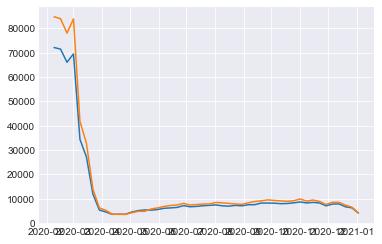

In [33]:
x = dfPweek.index
y1 = dfPweek2.LocationID
y2 = dfPweek.passenger_count

plt.plot(x,y1,y2)




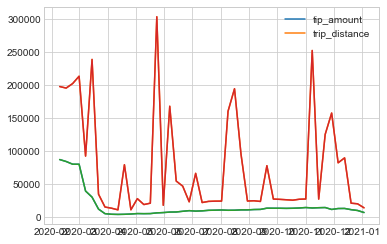

In [25]:
x = dfPweek.index
y1 = dfPweek.tip_amount
y2 = dfPweek.trip_distance


plt.plot(x, y1, label = "tip_amount")
plt.plot(x, y2, label = "trip_distance")

plt.legend()



plt.plot(x,y1,y2)

In [247]:
dfcovid = pd.read_csv(f'data-by-day.csv',error_bad_lines=False)


In [248]:
dfcovid['date_of_interest']  = dfcovid['date_of_interest'].apply(pd.to_datetime)

In [249]:
dfcovid.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
dfcovid = dfcovid.groupby(pd.Grouper(key='date_of_interest', freq='W')).sum()

In [251]:
dfcovid

,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
date_of_interest,,,,,,,,,,,,,,,,,,,,,
2020-03-01,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-08,45,0,59,0,0,12,12,19,0,0,...,2,0,0,0,0,0,0,0,0,0
2020-03-15,2932,1,819,7,1,1057,1057,384,1,2,...,40,0,0,41,0,41,17,0,0,0
2020-03-22,20475,26,4110,200,23,13207,13221,2496,87,99,...,187,14,4,764,1,765,120,5,7,0
2020-03-29,30145,243,9858,1268,241,26657,26776,7519,689,803,...,379,65,6,2085,7,2090,298,40,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-24,4794,1534,315,72,6,5289,6986,339,61,68,...,39,8,0,542,120,662,35,7,7,0
2021-10-31,4420,1393,221,53,1,4550,5961,262,65,68,...,16,3,0,475,85,560,25,6,6,0
2021-11-07,5047,1872,246,47,2,4713,6369,232,47,47,...,28,9,1,376,91,469,25,6,6,0


In [263]:
dfcovid2 = dfcovid.head(48)

In [264]:
dfcovid2

,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
date_of_interest,,,,,,,,,,,,,,,,,,,,,
2020-03-01,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-08,45,0,59,0,0,12,12,19,0,0,...,2,0,0,0,0,0,0,0,0,0
2020-03-15,2932,1,819,7,1,1057,1057,384,1,2,...,40,0,0,41,0,41,17,0,0,0
2020-03-22,20475,26,4110,200,23,13207,13221,2496,87,99,...,187,14,4,764,1,765,120,5,7,0
2020-03-29,30145,243,9858,1268,241,26657,26776,7519,689,803,...,379,65,6,2085,7,2090,298,40,45,0
2020-04-05,36096,974,11578,3239,972,34716,35338,11330,2397,3016,...,494,148,23,2229,14,2243,462,112,125,0
2020-04-12,34174,1374,9472,3954,1374,35864,37177,10612,3820,5133,...,421,183,50,3084,46,3130,468,175,220,0
2020-04-19,22963,868,5663,3116,867,26488,27587,7151,3571,4666,...,268,140,39,1952,40,1994,329,162,202,0
2020-04-26,18276,511,3268,2151,511,21010,21659,4128,2515,3164,...,164,84,27,1305,34,1340,195,107,142,0
